## Question 1

In [112]:
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Read in price data
df = pd.read_csv("equity/data.csv", index_col="date")
# df=df.iloc[::-1]
# df
df.pct_change().dropna(how="all").mean()


coalindia     0.000960
ibulhsgfin    0.001864
wipro         0.001000
ltfh          0.000314
tcs           0.000481
sunpharma     0.000656
biocon        0.001285
pvr          -0.000159
axisbank      0.000288
hdfcbank      0.000251
tatamotors    0.001078
cipla         0.000056
itc           0.000621
spicejet     -0.000052
reliance     -0.000305
infy          0.000530
bhel          0.001841
dabur        -0.000357
sbi           0.000342
bajfinance    0.005874
dtype: float64

In [113]:
mu = mean_historical_return(df,compounding=False,frequency=1)
mu

coalindia     0.000960
ibulhsgfin    0.001864
wipro         0.001000
ltfh          0.000314
tcs           0.000481
sunpharma     0.000656
biocon        0.001285
pvr          -0.000159
axisbank      0.000288
hdfcbank      0.000251
tatamotors    0.001078
cipla         0.000056
itc           0.000621
spicejet     -0.000052
reliance     -0.000305
infy          0.000530
bhel          0.001841
dabur        -0.000357
sbi           0.000342
bajfinance    0.005874
dtype: float64

In [39]:
# cov matrix
m = np.array([
    [10,15,13,15,14],
    [15,20,18,15,16],
    [10,15,11,14,13],
])
m = np.cov(m)
print(m)

# Model 1
e = np.array([1,1,1])
w = (np.dot(np.linalg.inv(m),np.transpose(e)))/np.dot(np.dot(np.linalg.inv(m),e),e)

print(w)

[[4.3  1.85 3.95]
 [1.85 4.7  1.9 ]
 [3.95 1.9  4.3 ]]
[0.30985915 0.44366197 0.24647887]


In [118]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df,compounding=False)
S = risk_models.sample_cov(df)

# Optimise for min valatile
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print(cleaned_weights)
for key in cleaned_weights.keys():
    print(key, cleaned_weights[key])
ef.portfolio_performance(verbose=True)

OrderedDict([('coalindia', 0.29219), ('ibulhsgfin', 0.08967), ('wipro', 0.11577), ('ltfh', 0.0), ('tcs', 0.0183), ('sunpharma', 0.07076), ('biocon', 0.03293), ('pvr', 0.0), ('axisbank', 0.0), ('hdfcbank', 0.0), ('tatamotors', 0.0), ('cipla', 0.0), ('itc', 0.09017), ('spicejet', 0.0), ('reliance', 0.0), ('infy', 0.00507), ('bhel', 0.26916), ('dabur', 0.0), ('sbi', 0.0), ('bajfinance', 0.01598)])
coalindia 0.29219
ibulhsgfin 0.08967
wipro 0.11577
ltfh 0.0
tcs 0.0183
sunpharma 0.07076
biocon 0.03293
pvr 0.0
axisbank 0.0
hdfcbank 0.0
tatamotors 0.0
cipla 0.0
itc 0.09017
spicejet 0.0
reliance 0.0
infy 0.00507
bhel 0.26916
dabur 0.0
sbi 0.0
bajfinance 0.01598
Expected annual return: 33.0%
Annual volatility: 25.4%
Sharpe Ratio: 1.22


(0.32985423593043284, 0.2539053427058217, 1.2203533514827778)

In [120]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df,compounding=False)
S = risk_models.sample_cov(df)
# Optimise for fined return
ef = EfficientFrontier(mu, S)
raw_weights = ef.efficient_return(target_return=0.3, market_neutral=True)
cleaned_weights = ef.clean_weights()
# ef.save_weights_to_file("weights.csv")  # saves to file
for key in cleaned_weights.keys():
    print(key, cleaned_weights[key])
ef.portfolio_performance(verbose=True)

coalindia 0.18732
ibulhsgfin 0.08955
wipro 0.05234
ltfh -0.0911
tcs 0.00751
sunpharma 0.14379
biocon 0.02052
pvr -0.09853
axisbank -0.01696
hdfcbank -0.00393
tatamotors 0.09643
cipla -0.16221
itc 0.10883
spicejet -0.06746
reliance -0.06487
infy 0.0305
bhel 0.18057
dabur -0.35286
sbi -0.06776
bajfinance 0.00833
Expected annual return: 30.0%
Annual volatility: 17.0%
Sharpe Ratio: 1.64


(0.30000000000000016, 0.17044781643665352, 1.642731516622634)

In [3]:
# https://github.com/robertmartin8/PyPortfolioOpt/tree/master/cookbook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
pypfopt.__version__

'1.2.6'

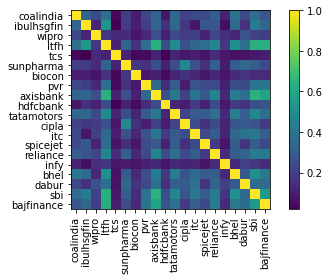

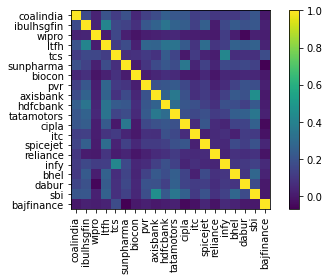

In [105]:
df = pd.read_csv("equity/data.csv", parse_dates=True, index_col="date")
past_df, future_df = df.iloc[:-600], df.iloc[-600:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

In [2]:
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Read in price data
df = pd.read_csv("data.csv", index_col="date")
# df=df.iloc[::-1]
# df
mu = df.pct_change().dropna(how="all").mean()

In [9]:
mu = np.array(mu)
mu

array([0.11346154, 0.03333333, 0.10865801])

In [4]:
muf = 0.05

In [12]:
m = df.pct_change().apply(lambda x: np.log(1+x)).cov()

In [13]:
wd = np.dot(np.linalg.inv(m),(mu - muf*np.array([1,1,1]))) / np.dot(np.dot(np.array([1,1,1]),np.linalg.inv(m)), muf*np.array([1,1,1]))

In [14]:
wd

array([ 7.30134418, -2.58995328, -4.14254913])